In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
from umap import UMAP
import seaborn as sns
from cycifsuite.get_data import read_synapse_file
from cycifsuite.combat import combat
from cycifsuite.unsupervised_analysis import *
%load_ext autoreload
%autoreload 2

## Load data from synpase, drop lost cells and ComBat

In [3]:
# Load data from 0907 data
path = 'N:/HiTS Projects and Data/Personal/Jake/mcf10a'
os.chdir(path)
pooled_expr_data = pd.read_hdf('intensity_nuc_cytoplasm.hdf')
# pooled_metadata = pd.read_csv('Results/MCF10A drug profiling metadata clustered.csv',index_col=0)
pooled_metadata = pd.read_csv('proper_FFC_metadata.csv',index_col=0)
pooled_metadata = pooled_metadata[(pooled_metadata.labeled_as_lost=='No')&(pooled_metadata.num_nuclei_in_mask==1)]
pooled_expr_data = pooled_expr_data.loc[pooled_metadata.index]
pooled_expr_data = pooled_expr_data.transpose().sort_index().transpose()
pooled_expr_data = combat(pooled_expr_data.transpose(), pooled_metadata.replicate).transpose()

found 3 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


## Binning based on technical replicates, and PCA transformation.

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'
pooled_metadata['bio_tec_rep'] = pooled_metadata.sampleid + '_' + pooled_metadata.Well
valid_metadata = pooled_metadata
valid_expr_data = pooled_expr_data
valid_metadata['bio_tec_rep'] = valid_metadata.sampleid + '_' + valid_metadata.Well
binned_data = bin_expr_data(valid_expr_data, valid_metadata, bin_on_col='bio_tec_rep')
t_data, top_genes = PCA_transform_data(binned_data,valid_metadata, binned_on_col = 'bio_tec_rep', metadata_cols=['ligand', 'time','replicate'])

## Plotting

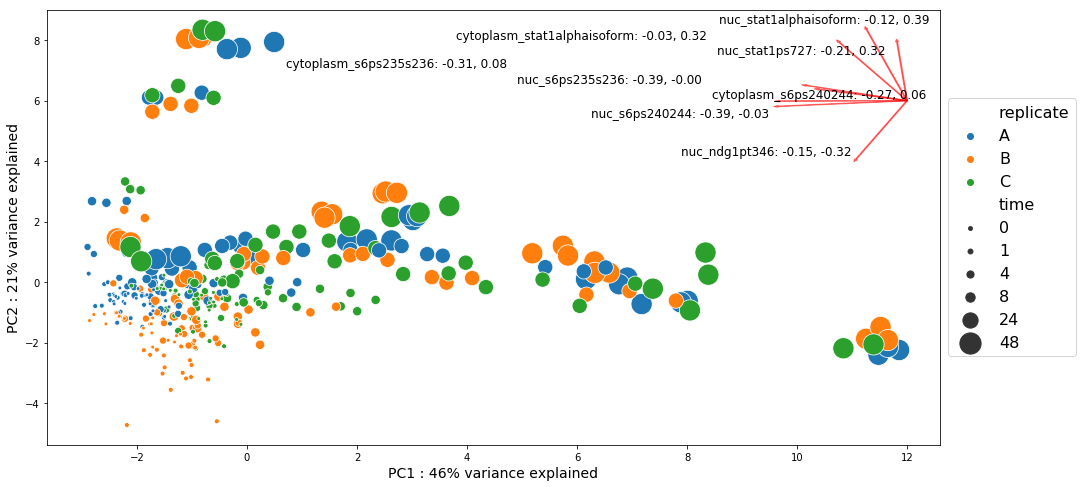

In [5]:
plot_PCA_2D(t_data,top_genes, legend='full', arrow_length_fold=6,metadata_cols=['replicate','time'])

### Figure 7 in the method document.

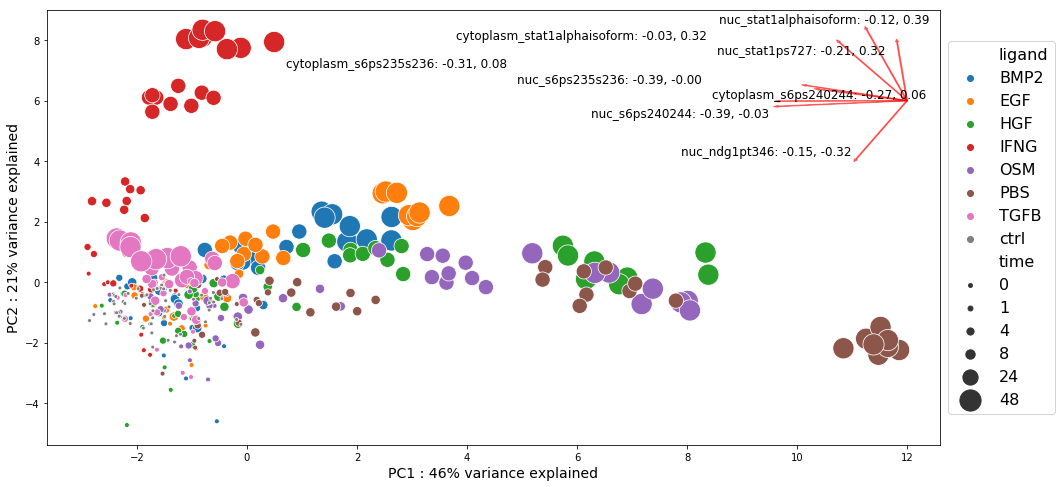

In [6]:
plot_PCA_2D(t_data,top_genes, legend='full', arrow_length_fold=6,metadata_cols=['ligand','time'])

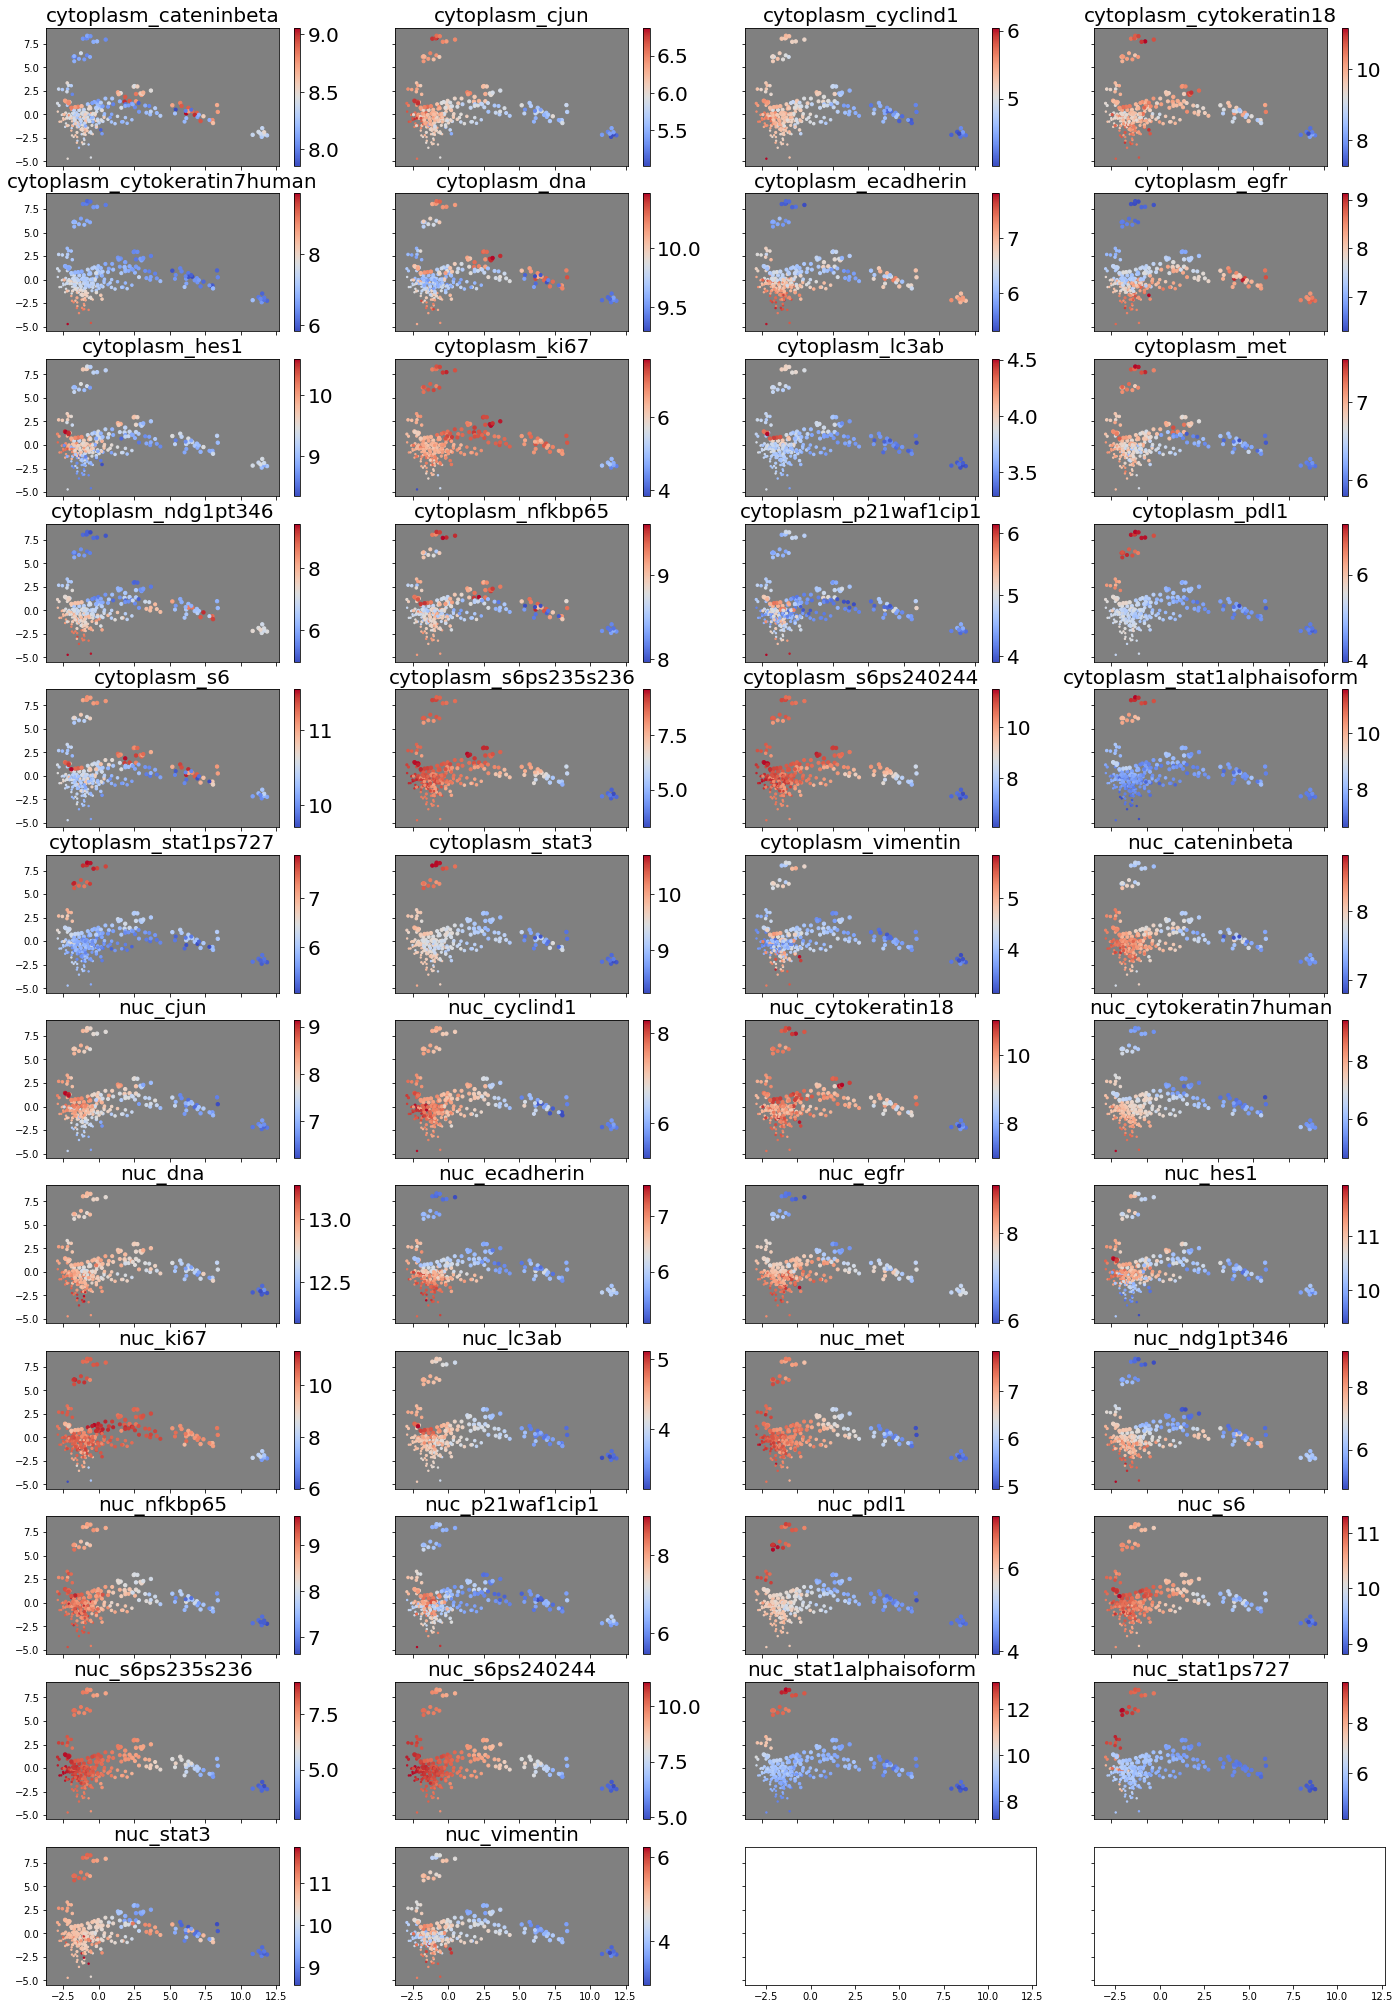

In [7]:
expr_pca_plot(t_data, binned_data)